# K-means on example dataset

In [1]:
# working directory
import os

print('Current working directiry: ', os.getcwd())
print('List of files in working directory : ', os.listdir())

Current working directiry:  C:\Users\Santosh Sharma\Desktop\coursera-machine-learning-stanford\K-means-Clustering
List of files in working directory :  ['.ipynb_checkpoints', 'bird_small.png', 'ex7data2.mat', 'K-means Algorithm.ipynb']


In [2]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

sns.set()
%matplotlib inline

In [13]:
# Initialize random centroids
def random_centroids(X, k):
    '''
    This function initializes K centroids that are to be used in K-Means on the dataset X
    '''
    # Initialize value
    # no. of row and columns
    m,n = X.shape
    # Return 
    centroids = np.zeros(shape = (k, n))
    
    #
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[0:k]]
    
    return centroids

In [14]:
# Find closest centroid
def findClosestCentroids(X, centroids):
    '''
    This function computes the centroid memberships for every example
    '''
    # Initialize values
    k = centroids.shape[0]
    m = X.shape[0]
    #distance = np.zeros(centroids.shape)
    
    # Return
    idx = np.zeros(shape = (m, 1))
    distance = np.zeros(shape = (k,1))
    
    # Compute centroid
    for i in range(m):
        for j in range(k):
            distance[j] = np.sum(np.square(X[i,:] - centroids[j,:]), axis = 0)
        # added 1 bcoz, index starts with 0, needed 1
        idx[i, :] = np.argmin(distance) + 1
        
    return idx 

In [15]:
# compute cetroid mean
def computeCentroids(X, idx, k):
    # Initialize values
    m, n = X.shape
    
    # Return
    centroid_mean = np.zeros(shape = (k, n))
    
    # Loop over k
    for i in range(1, k+1):
        #temp = X[np.squeeze(idx) == i, :]
        #centroid_mean[i-1, :] = np.mean(temp, axis = 0)
        centroid_mean[i-1, :] =  X[np.squeeze(idx) == i, :].mean(axis = 0)
        
    return centroid_mean  

In [19]:
# k-means
def train_k_means(X, initial_centroids, max_iters):#, print_iteration = False):
    # initialize values
    m, n = X.shape
    k = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(shape = (m,1))
    d =  {}
    
    # Run K-Means
    for i in range(max_iters):
        # print if print_iteration is True.
        #if print_iteration:
            #print('K-Means iteration {} / {}...'.format(i, max_iters))
        
        # for each example if x assign it to closest centroid.
        idx = findClosestCentroids(X, centroids)
        
        # Given the membership, compute new centroids.
        centroids = computeCentroids(X, idx, k)
    
    #d = {'centroids' : centroids,
         #'idx' : idx}    
    return idx,centroids

In [17]:
# Ploting data
def plotDataPoints(X, idx, k):
    '''
    plots data points in X, coloring them so that those with the same
    index assignments in idx have the same color.
    
    Arguments:
    X --
    idx --
    k --
    
    Return:
    
    '''
    # Plot
    #plt.scatter(X[:,0], X[:,1], marker = 'p', s = 70, c = np.squeeze(idx), edgecolors = 'black', cmap = 'Set2')
    plt.scatter(X[:,0], X[:,1], marker = 'p', s = 70, c = np.squeeze(idx), edgecolors = 'black', 
                cmap = plt.cm.get_cmap('prism',3))
    
    
# connect lines
def connectpoints(X1,X2,p1,p2):
    x1, y1 = X1[:,p1], X1[:,p2]
    x2, y2 = X2[:,p1], X2[:,p2]
    plt.plot([x1,x2],[y1,y2],'r-')

In [10]:
# Plot
def plotProgressKMeans(X, k, initial_centroids, max_iters):
    # Initialize values
    centroids = initial_centroids
    previous_centroids = centroids
    
    # Set paramaters for plot
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize = (13,8))
    #fig.subplots_adjust(hspace=0.2, wspace=0.1)
    
   
    # Loop over max_iters
    for i in range(max_iters):
        #
        idx = findClosestCentroids(X, centroids)
        
        # Plot data points
        #fig.add_subplot(5,2,i+1)
        plotDataPoints(X, idx, k)
        plt.axis([-2,10,0,6])
        
        
        # Plot the centroids as black x's
        plt.plot(centroids[:,0], centroids[:,1],'kX', markersize = 10)      
        
        # Connect the new centroid and previous centroid
        connectpoints(centroids,previous_centroids,0,1) 
        
        # update previous centroids
        previous_centroids = centroids
       
        # Title    
        #plt.title('iteration number - ' + str(i+1), fontsize = 20)
        
        # Compute new centroid
        centroids = computeCentroids(X, idx, k)

In [20]:
# Run K-means on example dataset
# Load Data
mat_file = loadmat('ex7data2.mat')

# Train data-
X = mat_file['X']
#
print('Finding closest centroids.\n')

# Select an initial set of centroids
# No of centroids k
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Find the closest centroids for the examples using the
# initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print('{}\n'.format(np.squeeze(idx[:3,:])))

# compute centroids means
print('Computing centroids means:-')
centroids = computeCentroids(X, idx, K);

print('Centroids computed after initial finding of closest centroids:')
print(centroids)

# Run k-means and plot data
print('\nRunning K-Means clustering on example dataset.')

# Set number of clusters(K) and maximum iterations
k = 3
max_iters = 10

idx,centroids = train_k_means(X, initial_centroids, max_iters = 10)



Finding closest centroids.

Closest centroids for the first 3 examples:
[1. 3. 2.]

Computing centroids means:-
Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

Running K-Means clustering on example dataset.


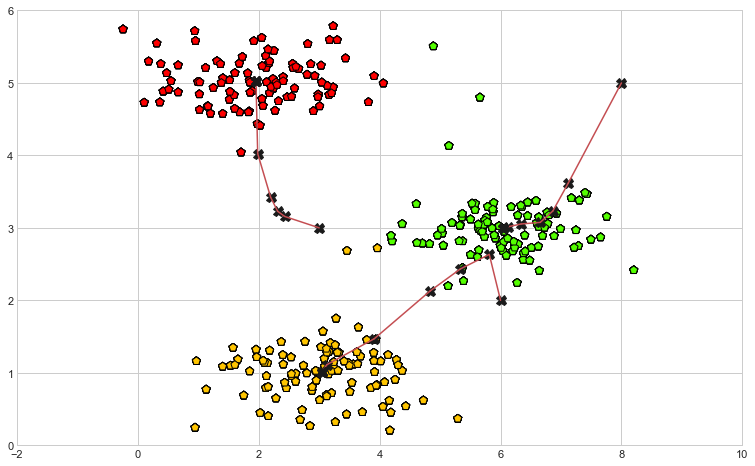

In [21]:
# Plot data and centroids after each iterations         
plotProgressKMeans(X, k, initial_centroids, max_iters)  